In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

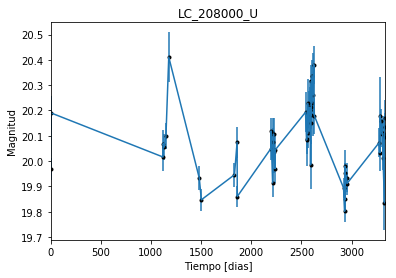

In [2]:
data = np.genfromtxt('LC_208000_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_208000_U')
plt.savefig("LC_208000_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

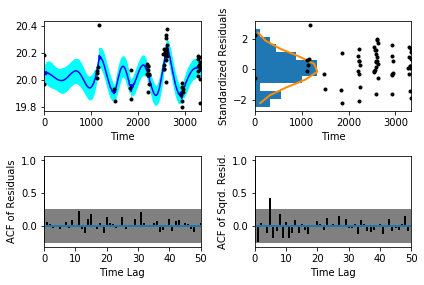

In [5]:
sample.assess_fit()

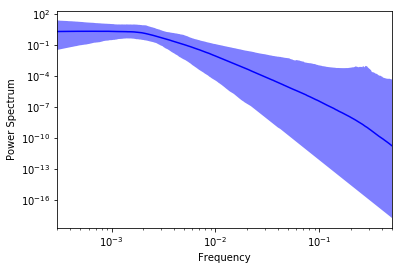

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

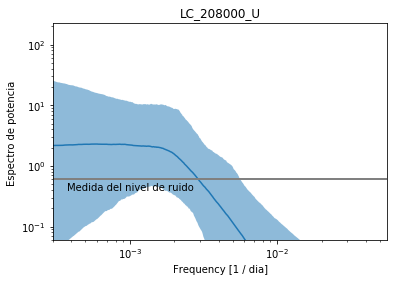

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_208000_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_208000_U')

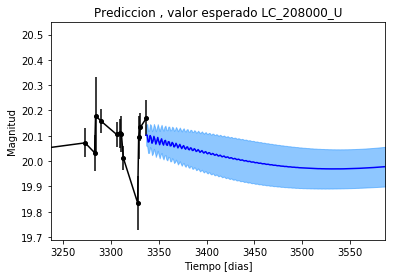

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_208000_U')

Text(0.5,1,'Prediccion, Caminos simulados LC_208000_U')

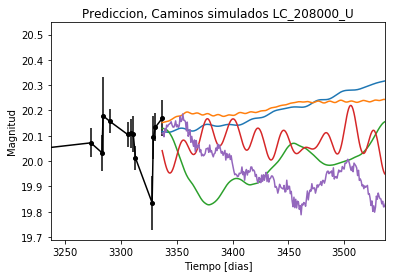

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_208000_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


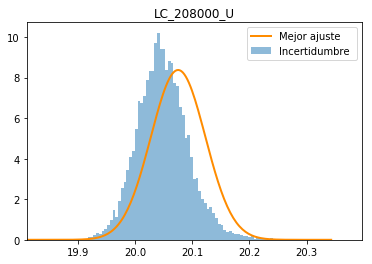

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_208000_U')
plt.savefig("Mejor_ajuste_LC_208000_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_208000_U')

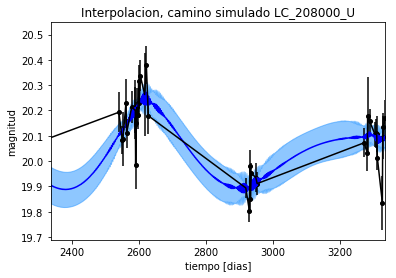

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_208000_U')

Text(0.5,1,'Interpolacion, camino simulado LC_208000_U')

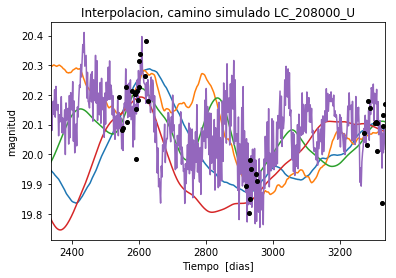

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_208000_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 722.464991959
Median: 0.00424792110305
Standard deviation: 0.151466578189
68% credibility interval: [ 0.0006041   0.07811985]
95% credibility interval: [  3.38608787e-04   6.04095330e-01]
99% credibility interval: [  3.07995184e-04   9.01335012e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 409.090256398
Median: 0.00218386998989
Standard deviation: 0.0849822193865
68% credibility interval: [ 0.00054576  0.02785765]
95% credibility interval: [ 0.00032996  0.26575983]
99% credibility interval: [  3.07308777e-04   6.49885480e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 265.137273965
Median: 0.00732832258691
Standar

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 568.445989774
Median: 75.5628775997
Standard deviation: 1.92967943533
68% credibility interval: [ 73.56288168  77.28825359]
95% credibility interval: [ 71.11219388  78.75067587]
99% credibility interval: [ 68.87057998  79.2194277 ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 608.997720016
Median: 0.417968429331
Standard deviation: 1.88652187198
68% credibility interval: [ 0.03482175  3.08271373]
95% credibility interval: [ 0.01179583  6.30599542]
99% credibility interval: [ 0.0093713   9.19206038]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1039.9618103
Median: 0.339045657826
Standard deviation: 8.09167855809
68% credibility interval: [ 0.00828241  7.4012297 ]
95% credibility interval: [  3.95242091e-04

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 901.000989395
Median: 1.61491258581e-38
Standard deviation: 2.36425172777e+66
68% credibility interval: [  3.78635276e-107   2.65943339e+004]
95% credibility interval: [  7.20119320e-153   1.44992204e+062]
99% credibility interval: [  1.59909561e-182   9.19561194e+064]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3630.54728642
Median: 20.0356570545
Standard deviation: 0.0524225438494
68% credibility interval: [ 19.9912739   20.07908511]
95% credibility interval: [ 19.93504356  20.13985651]
99% credibility interval: [ 19.87806915  20.20362685]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 335.158778651
Median: 0.0306764828197
Standard deviation: 0.239143607294
68% credibility interval: [ 0.          0.38336952]
95% credibility interval: [ 0.         0.8431096]
99% credibility interval: [ 0.          0.97631241]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 335.158778651
Median: 0.0306764828197
Standard deviation: 0.239143607294
68% credibility interval: [ 0.          0.38336952]
95% credibility interval: [ 0.         0.8431096]
99% credibility interval: [ 0.          0.97631241]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 706.776021934
Median: 0.0
Standard deviation: 0.00109400918393
68% credibi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 568.445989774
Median: 75.5628775997
Standard deviation: 1.92967943533
68% credibility interval: [ 73.56288168  77.28825359]
95% credibility interval: [ 71.11219388  78.75067587]
99% credibility interval: [ 68.87057998  79.2194277 ]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3425.41509034
Median: 0.0157201347853
Standard deviation: 0.0177453252813
68% credibility interval: [ 0.00923097  0.02902019]
95% credibility interval: [ 0.00565107  0.05969444]
99% credibility interval: [ 0.00408702  0.11112492]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 794.691200732
Median: 1.29169984043
Standard deviation: 0.211962942369
68% credibility interval: [ 1.10359305  1.51903729]
95% credibility interval: [ 0.92567695  1.76409168]
99% credibility interval: [ 0.80973609  1.89806897]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 768.442477881
Median: 8.80875473273e-05
Standard deviation: 0.161417334729
68% credibility interval: [  4.64655666e-10   8.54852597e-03]
95% credibility interval: [  5.11896306e-67   3.19689515e-01]
99% credibility interval: [  6.38550419e-71   1.08134999e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 722.464991959
Median: (-0.0266904754608-0.890996283029j)
Standard deviation: 1.77861638307
68% credibility interval: [-0.49084150-1.69848322j -0.00379566-0.8346559j ]
95% credibility interval: [ -3.79564290e+00+0.j          -2.12754175e-03-0.01763156j]
99% credibility interval: [ -5.66325491e+00+0.j          -1.93519082e-03-0.01230343j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 409.090256398
Median: (-0.0137216598332+0.00819833115915j)
Standard deviation: 1.59463780278
68% credibility interval: [-0.17503479+3.65802576j -0.00342912+0.0405413j ]
95% credibility interval: [-1.66981828+1.56194334j -0.00207321+2.34888922j]
99% credibility interval: [ -4.08335090e+00+4.92007703j  -1.93087800e-03+0.01394927j]
Posterior 